### Feature Selection techniques

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
x=df.drop(labels=['price_range'],axis=1)
y=df['price_range']
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


#### SelectKBest

In [5]:
from sklearn.feature_selection import SelectKBest,chi2
k_best=SelectKBest(score_func=chi2,k=20)
feat=k_best.fit(x,y)

In [6]:
print(feat)

SelectKBest(k=20, score_func=<function chi2 at 0x00000216EA71DAF8>)


In [9]:
dfscores=pd.DataFrame(feat.scores_,columns=['Scores'])
dfcolumns=pd.DataFrame(df.columns)
feat_scores=pd.concat([dfcolumns,dfscores],axis=1)
feat_scores.head()

,0,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [10]:
feat_scores.nlargest(10,columns='Scores')

,0,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Feature Importance

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [12]:
model.feature_importances_

array([0.06362796, 0.01860224, 0.03241045, 0.01907594, 0.03101468,
       0.01669877, 0.03373763, 0.03252267, 0.03519734, 0.03268511,
       0.03261375, 0.04759068, 0.04845026, 0.40678679, 0.03284721,
       0.03258634, 0.0325666 , 0.01446252, 0.01645624, 0.02006682])

In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

<AxesSubplot:>

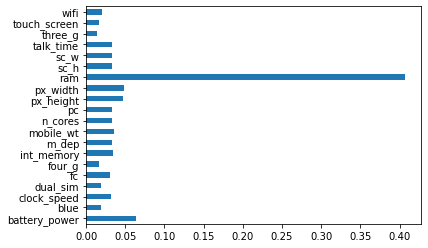

In [13]:
pd.Series(model.feature_importances_,index=x.columns).plot(kind='barh')

<AxesSubplot:>

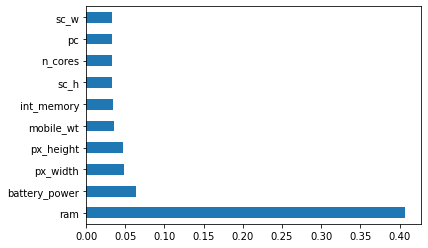

In [15]:
pd.Series(model.feature_importances_,index=x.columns).nlargest(10).plot(kind='barh')

#### Correlation

<AxesSubplot:>

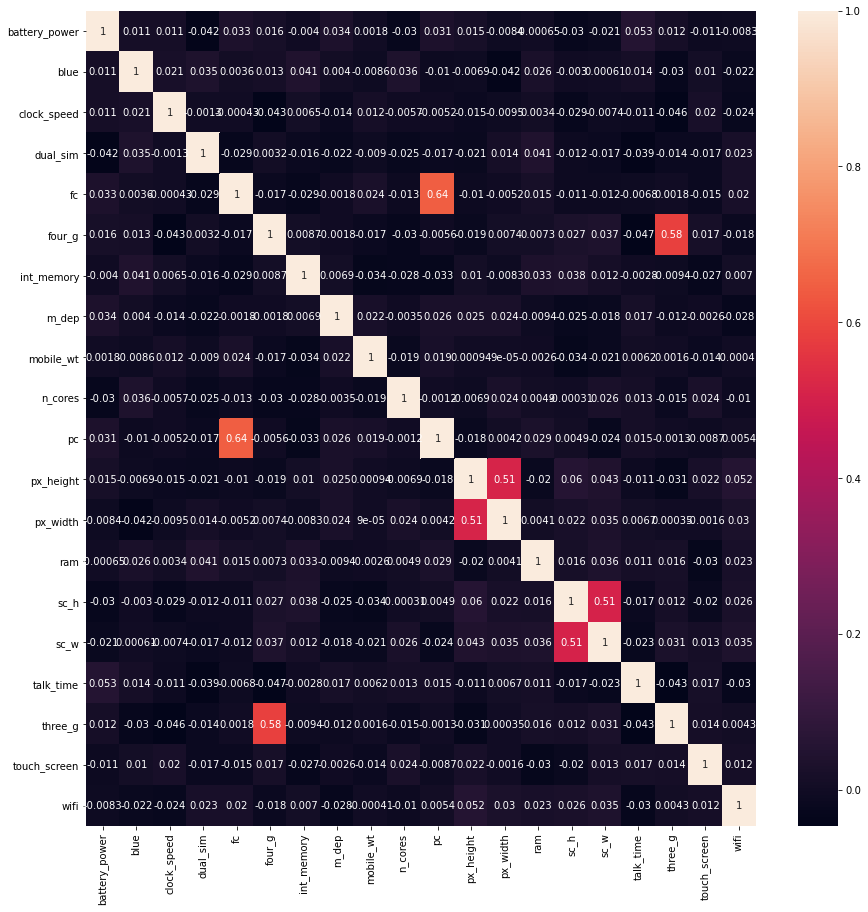

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation=df.drop(labels=['price_range'],axis=1).corr()
cor_indexes=correlation.index
plt.figure(figsize=(15,15))
sns.heatmap(correlation[cor_indexes],annot=True)

we can set threshold and remove one of the features which crosses the threhold

In [21]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
threshold=0.5
correlation(df.drop(labels=['price_range'],axis=1),threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

we can also we the below method to get the correlation between features

#### Information Gain

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)

array([3.27339097e-02, 0.00000000e+00, 4.63861514e-04, 0.00000000e+00,
       1.69243387e-02, 4.83556836e-03, 0.00000000e+00, 8.69358607e-03,
       1.71721776e-02, 4.92282916e-03, 3.92729610e-03, 2.90226203e-02,
       2.94053585e-02, 8.47411528e-01, 0.00000000e+00, 1.60180673e-02,
       0.00000000e+00, 1.07756017e-02, 0.00000000e+00, 8.21914285e-04])

In [26]:
series=pd.Series(mutual_info_classif(x,y),index=x.columns).sort_values(ascending=False)
series

ram              0.845294
battery_power    0.029940
px_height        0.028227
px_width         0.027905
mobile_wt        0.014717
sc_h             0.009287
four_g           0.009254
pc               0.006413
touch_screen     0.002830
m_dep            0.002607
fc               0.001063
blue             0.000000
clock_speed      0.000000
dual_sim         0.000000
wifi             0.000000
int_memory       0.000000
sc_w             0.000000
talk_time        0.000000
three_g          0.000000
n_cores          0.000000
dtype: float64